In [ ]:
import numpy as np

def create_n_observations_days(n, lamb):
    observations = np.random.poisson(lamb, n)
    return observations

lamb=10 #True lambda 
n=400000 
data=create_n_observations_days(n, lamb)


In [ ]:
#Initial values for alpha and beta
alpha=2
beta=2 

In [76]:
def updated_posterior(alpha, beta, data):
    """
    Calculate the updated posterior parameters for lambda given data and prior parameters alpha and beta.
    
    Parameters:
    alpha (float): Prior shape parameter (alpha) of the Gamma distribution.
    beta (float): Prior rate parameter (beta) of the Gamma distribution.
    data (np.ndarray): Array of observed data points.
    
    Returns:
    tuple: Updated posterior parameters (alpha', beta').
    """
    alpha_prime = alpha + np.sum(data)
    beta_prime = beta + len(data)
    return alpha_prime,beta_prime

# Example usage
alpha_prime,beta_prime = updated_posterior(alpha, beta, data)
print(f"Updated lambda: {alpha_prime / beta_prime:.2f}")

Updated lambda: 10.01


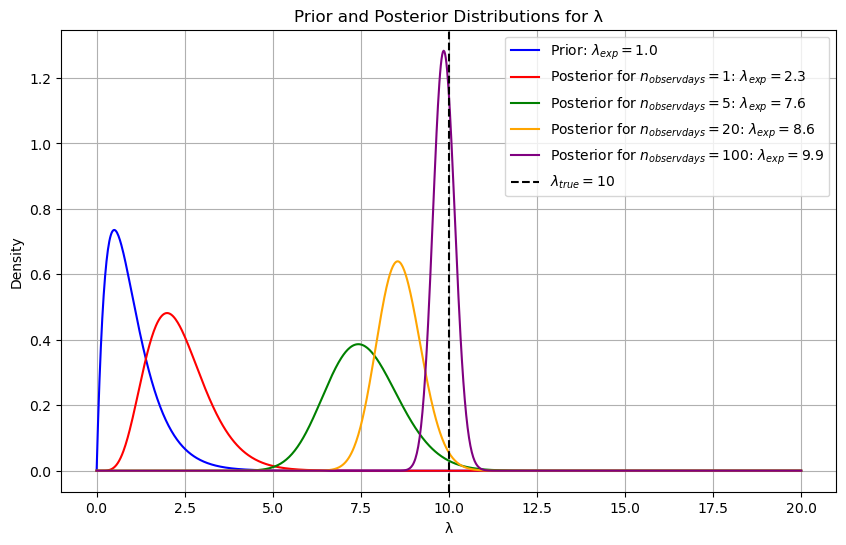

In [81]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Generate a range of lambda values
lambda_values = np.linspace(0, 20, 1000)

# Plot the prior distribution
prior_pdf = gamma.pdf(lambda_values, alpha, scale=1/beta)
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, prior_pdf, label=f'Prior: $\\lambda_{{exp}}={alpha/beta:.1f}$', color='blue')

# Plot the posterior distributions for different n
n_values = [1, 5, 20,100]
colors = ['red', 'green', 'orange', 'purple']
for i, n in enumerate(n_values):
    dobservations = data[:n]
    alpha_prime, beta_prime = updated_posterior(alpha, beta, dobservations)
    posterior_pdf = gamma.pdf(lambda_values, alpha_prime, scale=1/beta_prime)
    plt.plot(lambda_values, posterior_pdf, label=f'Posterior for $n_{{observ days}}={n}$: $\\lambda_{{exp}}={alpha_prime/beta_prime:.1f}$', color=colors[i])

# Add a vertical line for the true lambda value
plt.axvline(x=lamb, color='k', linestyle='--', label=fr'$\lambda_{{true}}={lamb}$')

# Add labels and legend
plt.xlabel('λ')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions for λ')
plt.legend()
plt.grid(True)
plt.show()

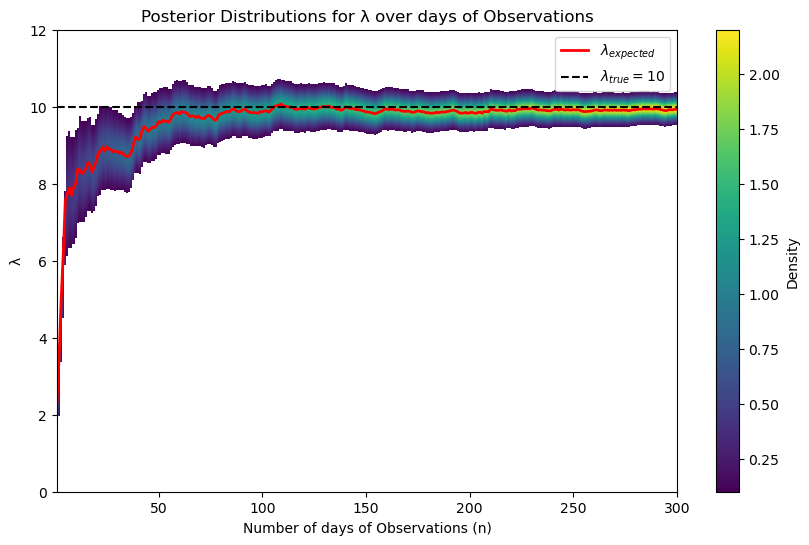

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma


# Generate data
n_total = 300

# Generate a range of lambda values
lambda_values = np.linspace(0, lamb+2, 1000)

# Generate the posterior distributions for different n
n_values = np.arange(1, n_total + 1)
pdf_matrix = np.zeros((len(n_values), len(lambda_values)))
lambda_values_over_n= np.zeros(len(n_values))

for i, n in enumerate(n_values):
    dobservations = data[:n]
    alpha_prime, beta_prime = updated_posterior(alpha, beta, dobservations)
    lambda_values_over_n[i] = alpha_prime/beta_prime
    pdf_matrix[i, :] = gamma.pdf(lambda_values, alpha_prime, scale=1/beta_prime)

# Set values below 0.1 to white
pdf_matrix[pdf_matrix < 0.1] = np.nan

# Plot the heatmap
plt.figure(figsize=(10, 6))
#plt.imshow(pdf_matrix.T, aspect='auto', extent=[n_values[0], n_values[-1], lambda_values[0], lambda_values[-1]], cmap='Blues', norm=LogNorm(), origin='lower')

plt.imshow(pdf_matrix.T, aspect='auto', extent=[n_values[0], n_values[-1], lambda_values[0], lambda_values[-1]], cmap='viridis', origin='lower',label='Probability distrubrion')
plt.plot(n_values, lambda_values_over_n, color='red',linewidth=2, label=r'$\lambda_{expected}$')
plt.colorbar(label='Density')
plt.xlabel('Number of days of Observations (n)')
plt.ylabel('λ')
plt.title('Posterior Distributions for λ over n days of Observations')

# Add a horizontal line for the true lambda value
plt.axhline(y=lamb, color='k', linestyle='--', label=fr'$\lambda_{{true}}={lamb}$')
plt.legend()
plt.show()